<a href="https://colab.research.google.com/github/fatimasadiq/My_first_project/blob/master/Covid19_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Self Driving Car Sentiment Analysis
Steps are given below :
1. Data Extraction (but self Driving car data is taken from kaggle)
2.Preprocessing of data is done
3.Frequecy of words is generated.
4.Word Cloud is generated
5.Sentiment Aalysis is done
6.Heatmap is still progress

In [0]:
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
#import pandas as pd
import time
import csv

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
import pandas as pd
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
tk = Tokenizer()
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))
import string
import inflect
import seaborn as sn
p = inflect.engine()
import matplotlib.pyplot as plt


In [12]:
!pip install twitter-text-python

  Created wheel for twitter-text-python: filename=twitter_text_python-1.1.1-cp36-none-any.whl size=10043 sha256=2efa5aff20ae2a3e7176022be3681f70d467a320a5456d65bed9f699b3b73308
  Stored in directory: /root/.cache/pip/wheels/08/a4/8b/fc095442f760d0103f128b052ca90c46485077541c5a6a86bc
Successfully built twitter-text-python


In [0]:
#Tweet Preprocessing

# emojis , special Character, URLS, tags
from ttp import ttp
import re
def cleanUrls(tweet):
    p = ttp.Parser()
    cleaned = tweet
    urls = p.parse(tweet).urls
    tags = p.parse(tweet).tags
    #schar = p.parse(tweet).schar
    # replies = p.parse(tweet).reply
    # print('replies', replies)
    for url in urls:
        cleaned = cleaned.replace(url, '')
    for tag in tags:
        cleaned = cleaned.replace('#'+tag, '')
    #for spchr in schar:
       #cleaned = cleaned.replace('ÃŒÂ¢â€°Ã¢Ã‚â€°Ã£Â¢s' ,'')

    print('.')
    return cleaned



In [0]:
import pandas as pd
#from tweetProcess import cleanUrls

tweets = pd.read_csv('data/covid19tweets.csv',encoding="ISO-8859-1", usecols=['tweets'])
for index, tweet in tweets.iterrows():
    c = cleanUrls(tweet[0])
    if len(c) > 40:
        df = pd.DataFrame([c])
        df.to_csv('cleaned.csv', mode='a', header=False, index=None)
print('finished')


Streaming output truncated to the last 5000 lines.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.

In [22]:
df = pd.read_csv('data/covid19tweets.csv',encoding="ISO-8859-1", usecols=['tweets'])
df.head()

,tweets
0,@DrTedros @s_sommaruga @CyrilRamaphosa @Emmanu...
1,@DrTedros @LubnaQassim @WHO @MohamedBinZayed @...
2,@malik_sajjad @DrTedros @Refugees @WHO @Filipp...
3,RT @WHO: WHO is promoting this campaign in man...
4,RT @WHO: The full briefing on #COVID19 by @DrT...


In [0]:
from string import punctuation
def strip_punctuation(df):
    return ''.join(c for c in df if c not in punctuation)

In [24]:

print (strip_punctuation(df))

tweets


In [25]:
cleaned = []
for index, tweet in df.iterrows():
  words = tweet[0].split()
  # print(len(words))
  tweet = ''
  for word in words:
    word = word.lower().strip()
    
print (strip_punctuation(" " + tweet + word + " "))
    

 covid19 


In [0]:
def is_Mention(word):
      if word[0] == '@' or word[0] == '#':
            return True
      return False

def is_Number(word):
      try:
        int(word)
        return True
      except:
        return False

def is_RT(word):
  return word == 'rt'

def is_link(word):
  urls = re.findall('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', word)
  return len(urls) > 0

def is_stop_word(word):
  return word in stop_words

def has_sc(word):
  pat ='[|\^&+()\%*/=!>.,:?"\'\!ì¡‰ûó0123456789`@Ã$ŒÂ¢â€°Ã¢Ã‚Ã¥Ã°ÂŸÂ‘Â‡%Ã¯Â¸Â]'
  sc = re.findall(pat, word)
  return len(sc) > 0

In [0]:
cleaned = []
for index, tweet in df.iterrows():
  words = tweet[0].split()
  # print(len(words))
  tweet = ''
  for word in words:
    word = word.lower().strip()
    # print(word)    
    if is_Mention(word) or is_Number(word) or is_RT(word) or is_link(word) or is_stop_word(word) or has_sc(word):
      pass
      # tweet = tweet.replace(word, " ")             
    else:
      tweet = " " + tweet + word + " "

  cleaned.append(tweet.strip())

In [0]:
cleaned_tweets = np.array(cleaned)
pd.DataFrame(cleaned_tweets, columns=None).to_csv('cleaned_tweets.csv', index=None)

In [0]:
#Frequency Generation for the Word Cloud
#  lets make a histogram first and store it in csv
import pandas as pd
import pprint
stopWords = {'ourselves', 'hers', 'between', "let's", '&amp;', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}
tweets = pd.read_csv('data/cleaned_tweets.csv',encoding="ISO-8859-1", header=None)
text = ''
freq = {}
for index, tweet in tweets.iterrows():
    words = tweet[0].split()
    for word in words:
        word = word.lower()
        if len(word) > 3 and word[0] != '@' and word not in stopWords:
            if word not in freq.keys():
                freq[word] = 1
            else:
                freq[word] += 1

# print(freq)
df = pd.Series(freq).to_frame()
df.to_csv('frequency.csv', mode='w')

# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(freq)

In [0]:
# now you have to do some manual changes in frequency file, by adding a row  and give i name words and frequency and sort it from largest to smallest

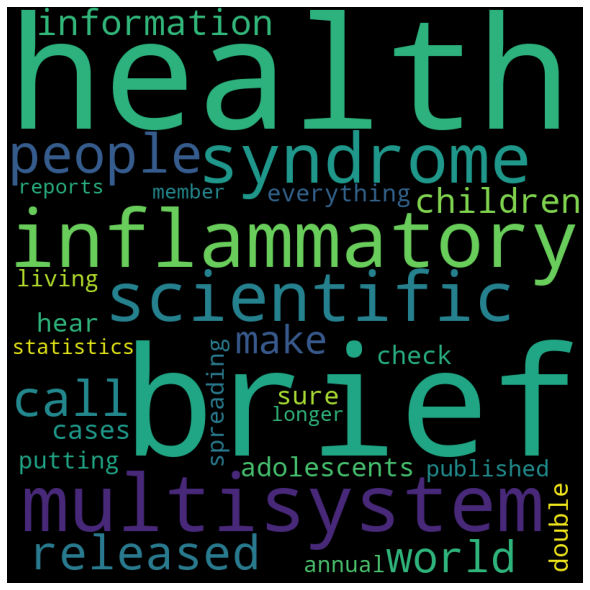

In [32]:
#Word Cloud Generation , The result  is taking on top 90 words

# Python program to generate WordCloud
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads 'Youtube04-Eminem.csv' file
# df = pd.read_csv(r"Youtube04-Eminem.csv", encoding="latin-1")
df = pd.read_csv('data/cleaned_tweets.csv', header=None)
comment_words = ' '
stopwords = set(STOPWORDS)
stopWords2 = {'ourselves', 'first','still','could','says','hers', 'between', "let's", 'amp', '&amp;', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}
tweets = pd.read_csv('data/frequency.csv', usecols=['words'], nrows=30)
hfwords = set()
for index, tweet in tweets.iterrows():
    hfwords.add(tweet[0])


# iterate through the csv file
for index, val in df.iterrows():
    # typecaste each val to string
    val = str(val[0])
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    for word in tokens:
        if len(word) > 3 and word[0] != '@' and word not in stopWords2 and word in hfwords:
            comment_words = comment_words + word + ' '
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      collocations=False,
                      min_font_size=5).generate(comment_words)
# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [0]:
 # Sentiment Analysis of tweets
 import pandas as pd
# from tweetProcess import cleanUrls
# import numpy as np
def sentimentAnalysis(points):
    if points > 0:
        return 'Positive'
    if points < 0:
        return 'Negative'
    return 'Neutral'


pWords = pd.read_csv('data/positiveWords.csv', encoding="ISO-8859-1", usecols=['positive'])
nWords = pd.read_csv('data/positiveWords.csv', encoding="ISO-8859-1", usecols=['negative'])
tweets = pd.read_csv('data/cleaned_tweets.csv', encoding="ISO-8859-1")

sent = []
p = []
text = []
pos =[]
neg = []

for index, tweet in tweets.iterrows():
    points = 0
    noofpositivewords=0
    noofnegativewords=0
    tweetArr = tweet[0].split()
    for index, word in pWords.iterrows():
            if str(word[0]) in tweetArr:
                noofpositivewords +=1
                points += 1

    for index, word in nWords.iterrows():
            if str(word[0]) in tweetArr:
                noofnegativewords +=1
                points -= 1

    p.append(points)
    text.append(tweet[0])
    sent.append(sentimentAnalysis(points))
    pos.append(noofpositivewords)
    neg.append(noofnegativewords)
    print(len(p))

dicts = {'tweet': text, 'points': p, 'sentiment': sent, 'noofpositivewords': pos, 'noofnegativewords' : neg}
df = pd.DataFrame(dicts)
df.to_csv('data/sentiments.csv', mode='w', index=None)
print('finished')

Streaming output truncated to the last 5000 lines.
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340

In [0]:
senti = pd.read_csv('data/sentiments.csv',encoding="ISO-8859-1")

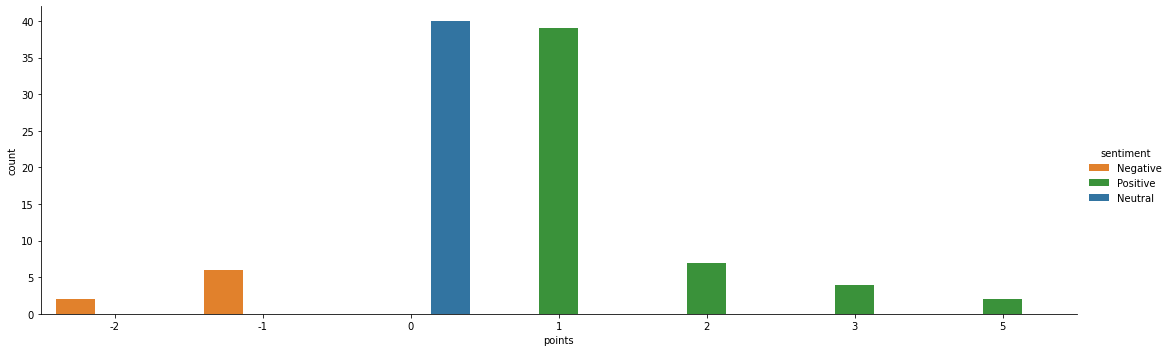

In [0]:
sn.axes_style('whitegrid')
sn.catplot('points', data=senti, aspect=3, kind='count', hue='sentiment', palette=['C1','C2', 'C0']).set_ylabels('count')

In [0]:
# Heatmap

In [0]:
freq = {}
for tweet in cleaned_tweets:
  for word in tweet.split():
    if word in freq:
      freq[word] +=1
    else:
      freq[word] = 0


In [0]:
word_frequency = np.array(list(freq.items()))

In [0]:
nouns = ['cars','vehicle','google','wheel',]
verbs = ['driverless',	'self-driving',	'autonomous',	'love',	'driving','cool','technology']

In [0]:
cleaned_tweets[0]

'two places invest money printing self-driving'

In [0]:
# dict = [noun-verb-count]
dic = []
for noun in nouns:
  for verb in verbs:
    count = 0
    for tweet in cleaned_tweets:
      for word in tweet.split():
        word = word.lower()
        if word.lower() == verb:
          if noun in tweet.split() or p.plural(noun) in tweet.split():
            count += 1
    dic.append([noun, verb, count])


In [0]:
nouns_verbs_freq = np.array(dic)

In [0]:
df3 = pd.DataFrame(nouns_verbs_freq, columns=['noun', 'verb', 'frequency']).to_csv('nouns-verbs-frequency.csv', index=None) 

In [0]:
flights_long = pd.read_csv('nouns-verbs-frequency.csv')

In [0]:
flights = flights_long.pivot("noun", "verb", "frequency")

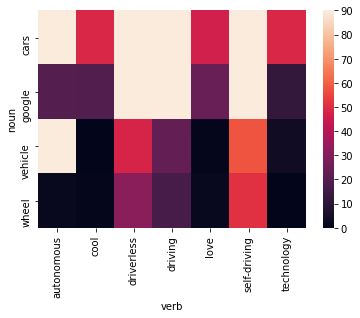

In [0]:
ax = sn.heatmap(flights , vmin=0, vmax=90)

Tasks for this week
1. increase the count of noun and verbs in heat map
2.replace group of similar meaning words with one word and then create a heatmap

In [0]:
#Task1


In [0]:
freq = {}
for tweet in cleaned_tweets:
  for word in tweet.split():
    if word in freq:
      freq[word] +=1
    else:
      freq[word] = 0


In [0]:
word_frequency = np.array(list(freq.items()))

In [0]:
nouns = ['cars','vehicle','google','wheel','traffic','accidents','parking','maps','internet','fuel','city','street','insurance','future','safety','electric','human']
verbs = ['driverless',	'self-driving',	'autonomous',	'love',	'driving','cool','technology','drive','steering','mastering','testing','invented','automated','need','reshape','rides','taxis','design','excited',]

In [0]:
# dict = [noun-verb-count]
dic = []
for noun in nouns:
  for verb in verbs:
    count = 0
    for tweet in cleaned_tweets:
      for word in tweet.split():
        word = word.lower()
        if word.lower() == verb:
          if noun in tweet.split() or p.plural(noun) in tweet.split():
            count += 1
    dic.append([noun, verb, count])


In [0]:
nouns_verbs_freq = np.array(dic)

In [0]:
df3 = pd.DataFrame(nouns_verbs_freq, columns=['noun', 'verb', 'frequency']).to_csv('nouns-verbs-frequency.csv', index=None) 

In [0]:
flights_long = pd.read_csv('nouns-verbs-frequency.csv')

In [0]:
flights = flights_long.pivot("noun", "verb", "frequency")

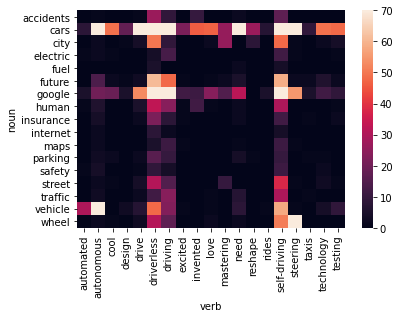

In [0]:
ax = sn.heatmap(flights , vmin=0, vmax=70)

In [0]:
#Task2

In [0]:
#dictionary
group={}
group['selfdriving'] =['self-driving' ,'self' ,'driving','driver-less']
group['car'] =['cars' ,'car','vehicle','vehicles','uber','wheel','tesla','toyota','taxi','mercedes-benz','mercedes-','cars;','nissan','wheels']
group['google'] = ['gooleplex','googles','google[x]','googlex','google-controlled', 'googler' , 'google-y','gestures#google','googlers','googlebots','[google]','futuregoogle']
group['city'] = ['francisco','standford','california','michigan','florida']
group['autonomous'] = ['automotive','semi-autonomous','fully-autonomous','non-autonomous','autonomously','autonomous-','automated','fully-automated']
group['love'] =['like','great','cool','awesome','smart','amazing','coolest']
group['technology']=['tech']
group['accident']=['accidents','crashes','issues','disrupt','terrible','incident','incidents']
group['dislike']=['lazy','drunk','shit','fuck','blind','crazy','stupid','fear']

In [0]:
grouped_tweets = []
# for tweet in cleaned_tweets[0:5]: for checking first 5 tweets only
for tweet in cleaned_tweets:
  for word in tweet.split():
    for sub_group in group:
      if word in group[sub_group]:
        tweet = tweet.replace(word, sub_group)
  grouped_tweets.append(tweet)

In [0]:
grouped_tweets 

['two places invest money printing selfdriving',
 'google driverless car help dislike travel often;',
 'google maps keep road supposed trust driverless car get around',
 'autonomous car seem way overhyped given technology challenges; pilotless planes seem much doable',
 'saw google selfdriving car painted green',
 'driverless car eventually replace car drivers',
 'chicago metro expected fully autonomous',
 'love infotainment system new thing almost drive',
 'autonomous car could reduce traffic fatalities',
 'driverless car worth want highway server accident',
 'driverless car legal city',
 'audi first carmaker get license nevada dmv test autonomous',
 'audi says first car manufacturer world get license nevada dmv test autonomous car make',
 'buying one audi ready test autonomous car public roads',
 'audi test selfdriving driverless car tampa pretty',
 'audi first automaker city test selfdriving',
 'audi gets first permit test selfdriving car city',
 'audi gets permit test selfdriving c

In [0]:
freq = {}
for tweet in grouped_tweets:
  for word in tweet.split():
    if word in freq:
      freq[word] +=1
    else:
      freq[word] = 0


In [0]:
word_frequency = np.array(list(freq.items()))

In [0]:
a = sorted(freq.items(), key=lambda x: x[1], reverse=True)
a = np.array(a)

In [0]:
words_limit = 5
x_axis = np.array(a[:words_limit, 0])
y_axis = np.array(a[:words_limit, 1], dtype=float)

<BarContainer object of 5 artists>

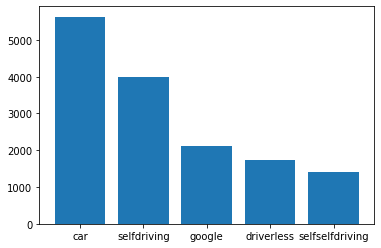

In [0]:
plt.bar(x_axis, y_axis)

In [0]:
a[0:50]

array([['car', '5630'],
       ['selfdriving', '3997'],
       ['google', '2124'],
       ['driverless', '1741'],
       ['selfselfdriving', '1406'],
       ['love', '557'],
       ['autonomous', '412'],
       ['-', '361'],
       ['saw', '310'],
       ['city', '288'],
       ['get', '238'],
       ['new', '233'],
       ['would', '232'],
       ['could', '228'],
       ['one', '223'],
       ['drive', '202'],
       ['future', '202'],
       ['see', '195'],
       ['via', '195'],
       ['need', '192'],
       ['first', '167'],
       ['think', '167'],
       ['want', '164'],
       ['technology', '159'],
       ['make', '149'],
       ['going', '138'],
       ['people', '131'],
       ['road', '126'],
       ['steering', '123'],
       ['way', '118'],
       ['take', '118'],
       ['next', '113'],
       ['says', '108'],
       ['dislike', '107'],
       ['accident', '107'],
       ['wait', '103'],
       ['still', '99'],
       ['really', '96'],
       ['time', '95'],
       ['dr

In [0]:
nouns = ['car','google','traffic','accident','parking','maps','internet','fuel','city','street','insurance','future','safety','electric','human']
verbs = ['selfdriving',	'autonomous',	'love','technology','drive','steering','mastering','testing','invented','need','reshape','rides','taxis','design','excited','dislike']

In [0]:
# dict = [noun-verb-count]
dic = []
for noun in nouns:
  for verb in verbs:
    count = 0
    for tweet in grouped_tweets:
      for word in tweet.split():
        word = word.lower()
        if word.lower() == verb:
          if noun in tweet.split() or p.plural(noun) in tweet.split():
            count += 1
    dic.append([noun, verb, count])

In [0]:
nouns_verbs_freq = np.array(dic)

In [0]:
df3 = pd.DataFrame(nouns_verbs_freq, columns=['noun', 'verb', 'frequency']).to_csv('nouns-verbs-frequency.csv', index=None) 

In [0]:
flights_long = pd.read_csv('nouns-verbs-frequency.csv')

In [0]:
flights = flights_long.pivot("noun", "verb", "frequency")

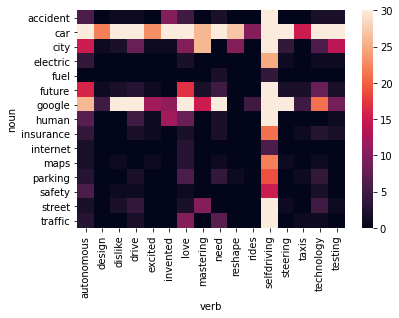

In [0]:
ax = sn.heatmap(flights , vmin=0, vmax=30)